In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time
import keras
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
import keras
from keras import layers
from keras.callbacks import EarlyStopping
from keras.models import Model
import tensorflow as tf
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [3]:
def plot_model_np(history, title):
    x = np.arange(len(history["val_accuracy"]))
    plt.plot(x, history["loss"], label="loss")
    plt.plot(x, history["val_loss"], label="val_loss")
    plt.plot(x, history["accuracy"], label="accuracy")
    plt.plot(x, history["val_accuracy"], label="val_accuracy")
    plt.title(title)
    plt.legend()

def confusion_matrix_plot(Model):
  Model_predict = Model.predict( test_features )
  Model_predict = np.argmax(Model_predict, axis=1)
  cm = confusion_matrix(Model_predict, test_labels)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=activity_labels, yticklabels=activity_labels)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()


In [4]:
train_df = pd.read_csv("/content/drive/MyDrive/HAR/HAR/Dataset/UCI/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/HAR/HAR/Dataset/UCI/test.csv")

In [5]:
train_features = train_df.drop(["Activity", "subject"], axis=1)
test_features = test_df.drop(["Activity", "subject"], axis=1)

train_labels = train_df["Activity"].replace(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'],  [0, 1, 2, 3, 4, 5])
test_labels = test_df["Activity"].replace(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'],  [0, 1, 2, 3, 4, 5])

In [6]:
print('Shape of Train data : ', train_df.shape)
print('Shape of X_Train : ', train_features.shape)
print('Shape of Train class : ', train_labels.shape)
print('Shape of Test data : ', test_df.shape)
print('Shape of X_test : ', test_features.shape)
print('Shape of Test class : ', test_labels.shape)

Shape of Train data :  (7352, 563)
Shape of X_Train :  (7352, 561)
Shape of Train class :  (7352,)
Shape of Test data :  (2947, 563)
Shape of X_test :  (2947, 561)
Shape of Test class :  (2947,)


In [7]:
train_features

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [8]:
stdsc = StandardScaler()
train_features = stdsc.fit_transform(train_features)
test_features = stdsc.fit_transform(test_features)

In [9]:
train_features

array([[ 0.20064157, -0.0636826 , -0.41962845, ..., -0.68721921,
         0.40794614, -0.00756789],
       [ 0.05594788,  0.03148567, -0.25390836, ..., -0.694138  ,
         0.40911698,  0.00787517],
       [ 0.07351535, -0.04341648, -0.07629468, ..., -0.702239  ,
         0.4102883 ,  0.02650234],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ..., -0.56584847,
         0.64059683,  0.34870928],
       [ 0.21586648, -0.02812252, -0.86770988, ..., -0.57766781,
         0.63147758,  0.29327564],
       [ 1.09620157,  0.12919873, -1.67268082, ..., -0.57392691,
         0.63274259,  0.33396081]])

In [10]:
from sklearn import discriminant_analysis
lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=5)
lda_fit = lda.fit(train_features, train_labels)
X_train_lda = lda.fit_transform(train_features, train_labels)
X_test_lda = lda.fit_transform(test_features, test_labels)

Model: "ANN_Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                192       
                                                                 
 input1 (Dense)              (None, 8)                 264       
                                                                 
 input2 (Dense)              (None, 32)                288       
                                                                 
 input3 (Dense)              (None, 8)                 264       
                                                                 
 input4 (Dense)              (None, 32)                288       
                                                                 
 output (Dense)              (None, 6)                 198       
                                                                 
Total params: 1494 (5.84 KB)
Trainable params: 1494 

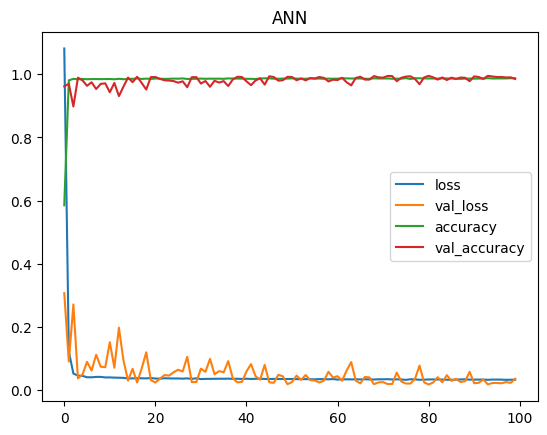

In [11]:
model_ANN_load = load_model('/content/drive/MyDrive/HAR/HAR/annnew/model-094-0.987622-0.994910.h5')
model_ANN_load.summary()
hc=np.load('/content/drive/MyDrive/HAR/HAR/annnew/ANN_LDA_new.npy',allow_pickle='TRUE').item()
plot_model_np(hc, "ANN")

In [12]:
scores = model_ANN_load.evaluate(X_test_lda, test_labels)
print('{:.2f}'.format(scores[1]*100),"%")

93/93 [==============================] - 1s 3ms/step - loss: 0.0184 - accuracy: 0.9949
99.49 %


In [13]:
extractor_model = keras.Sequential(model_ANN_load.layers[:-2])
extracted_features_train = extractor_model.predict(X_train_lda)
extracted_features_test = extractor_model.predict(X_test_lda)

93/93 [==============================] - 0s 1ms/step


In [14]:
X_train_lda[500]

array([14.42413321,  1.71571738, -0.74727157, -4.57115002,  0.38106801])

In [15]:
extracted_features_train[500]

array([ 0.        ,  0.        ,  0.18326955, 10.112542  , 16.614513  ,
        4.1552896 ,  0.        , 15.119831  ], dtype=float32)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.75      0.95      0.84       491
           2       0.94      0.71      0.81       532
           3       0.95      0.94      0.94       496
           4       0.92      0.88      0.90       420
           5       0.90      0.95      0.93       471

    accuracy                           0.90      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.91      0.90      0.90      2947

Random Forest Accuracy: 90.33%
Random Forest recall_score: 90.42%
Random Forest precision_score: 90.99%
Random Forest f1_score: 90.25%


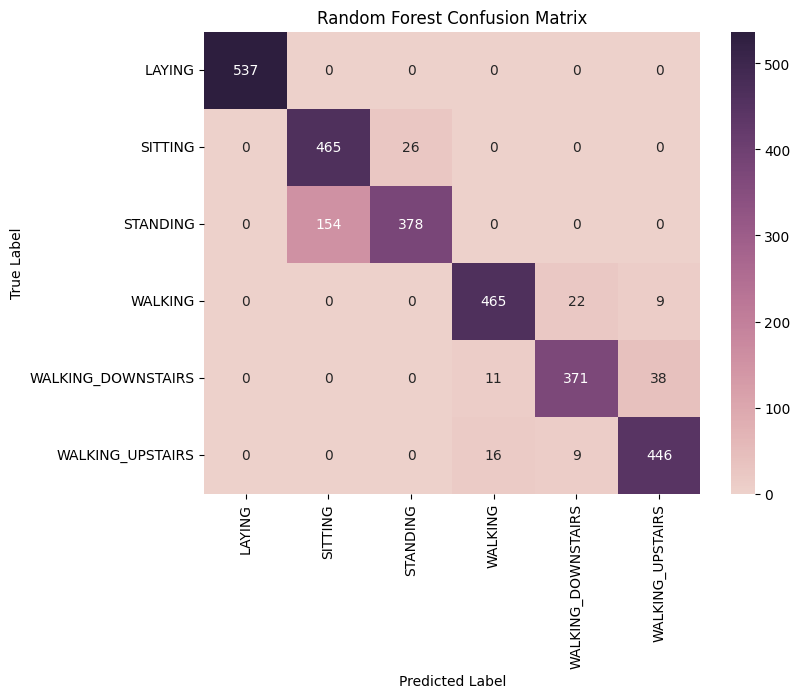

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.58      0.88      0.70       491
           2       0.79      0.41      0.54       532
           3       0.88      0.89      0.89       496
           4       0.83      0.87      0.85       420
           5       0.86      0.82      0.84       471

    accuracy                           0.81      2947
   macro avg       0.82      0.81      0.80      2947
weighted avg       0.83      0.81      0.80      2947

Decision Tree Accuracy: 80.83%
Decision Tree recall_score: 81.21%
Decision Tree precision_score: 82.48%
Decision Tree f1_score: 80.31%


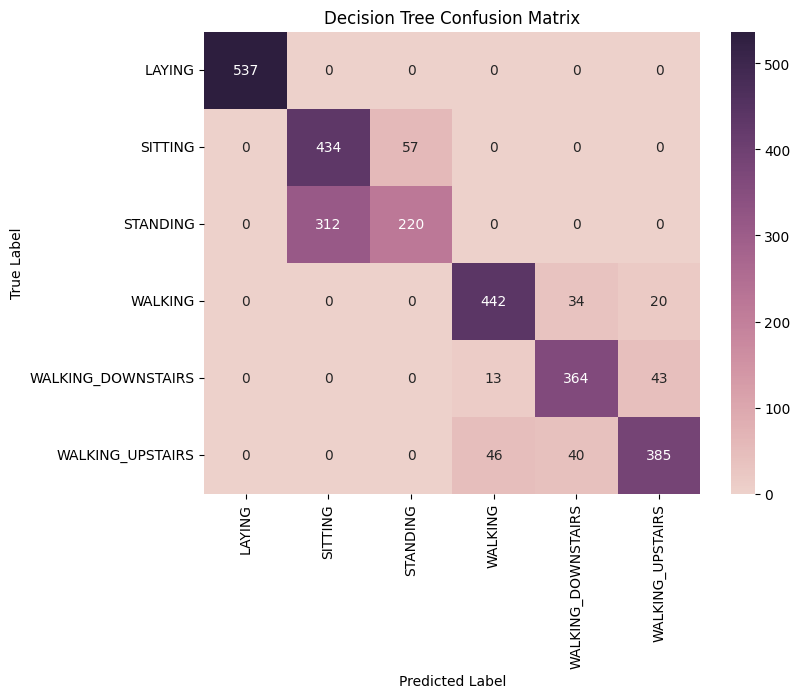

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       537
           1       0.92      0.85      0.89       491
           2       0.88      0.95      0.91       532
           3       0.87      0.96      0.91       496
           4       0.95      0.82      0.88       420
           5       0.89      0.92      0.90       471

    accuracy                           0.92      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.92      0.92      0.92      2947

K-Nearest Neighbors Accuracy: 91.55%
K-Nearest Neighbors recall_score: 91.16%
K-Nearest Neighbors precision_score: 91.79%
K-Nearest Neighbors f1_score: 91.31%


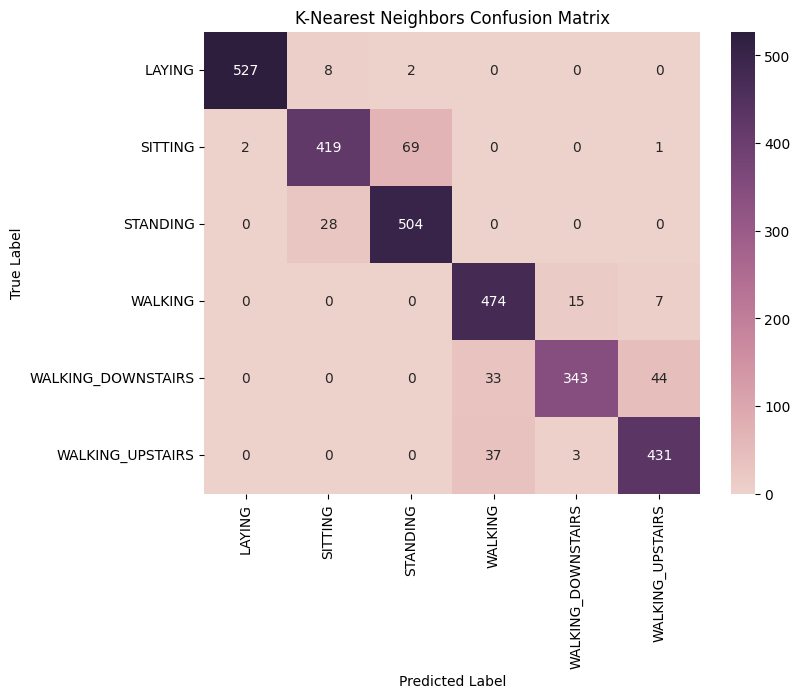

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.91      0.93       491
           2       0.92      0.96      0.94       532
           3       0.98      0.98      0.98       496
           4       0.98      0.96      0.97       420
           5       0.96      0.97      0.97       471

    accuracy                           0.97      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.97      0.97      0.97      2947

Support Vector Machine Accuracy: 96.50%
Support Vector Machine recall_score: 96.46%
Support Vector Machine precision_score: 96.57%
Support Vector Machine f1_score: 96.49%


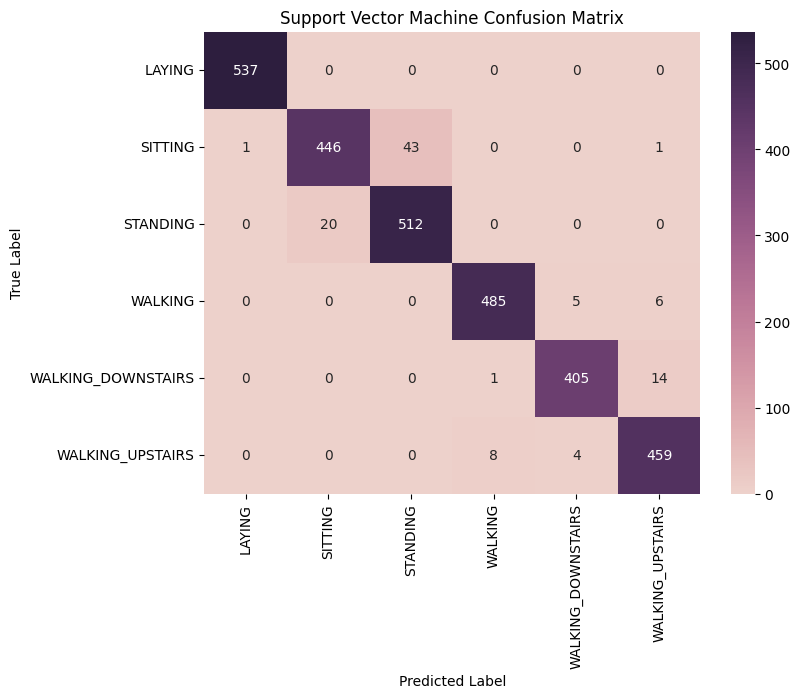

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       537
           1       0.96      0.88      0.92       491
           2       0.86      0.96      0.91       532
           3       0.96      0.99      0.97       496
           4       0.98      0.94      0.96       420
           5       0.95      0.95      0.95       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

SVM-SGD Accuracy: 94.67%
SVM-SGD recall_score: 94.62%
SVM-SGD precision_score: 95.02%
SVM-SGD f1_score: 94.73%


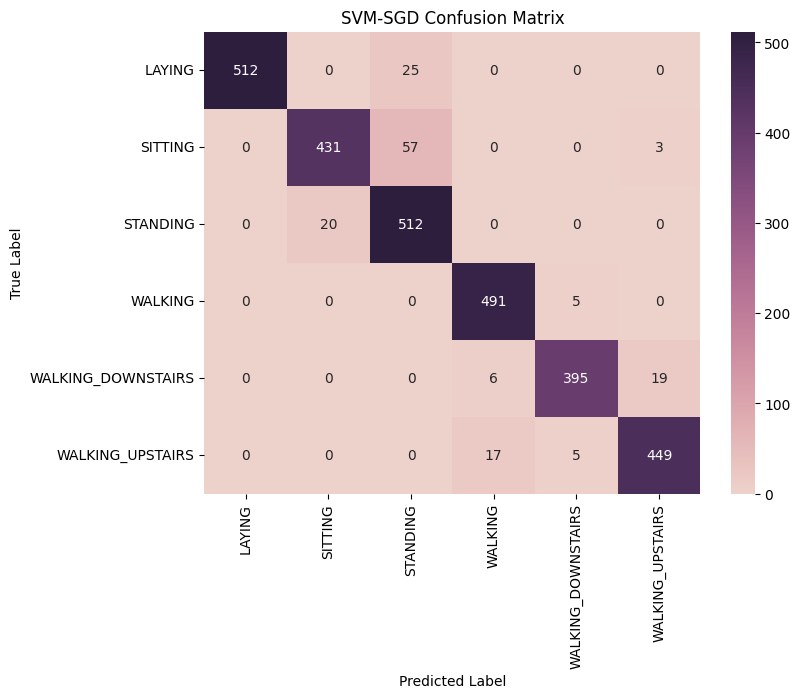

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.99      0.52       537
           1       0.00      0.00      0.00       491
           2       0.72      0.04      0.08       532
           3       0.89      0.75      0.82       496
           4       0.76      0.74      0.75       420
           5       0.75      0.94      0.83       471

    accuracy                           0.57      2947
   macro avg       0.58      0.58      0.50      2947
weighted avg       0.57      0.57      0.49      2947

Gaussian Naive Bayes Accuracy: 57.14%
Gaussian Naive Bayes recall_score: 57.84%
Gaussian Naive Bayes precision_score: 58.00%
Gaussian Naive Bayes f1_score: 50.15%


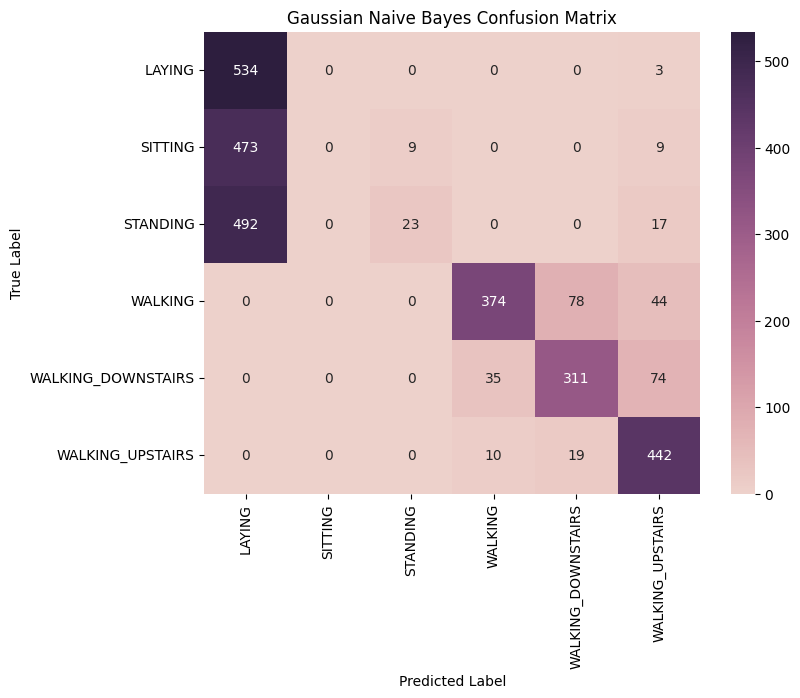

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       537
           1       0.95      0.88      0.92       491
           2       0.90      0.97      0.93       532
           3       0.98      0.97      0.98       496
           4       0.99      0.99      0.99       420
           5       0.97      0.98      0.98       471

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.97      0.96      0.96      2947

Logistic Regression Accuracy: 96.44%
Logistic Regression recall_score: 96.46%
Logistic Regression precision_score: 96.62%
Logistic Regression f1_score: 96.49%


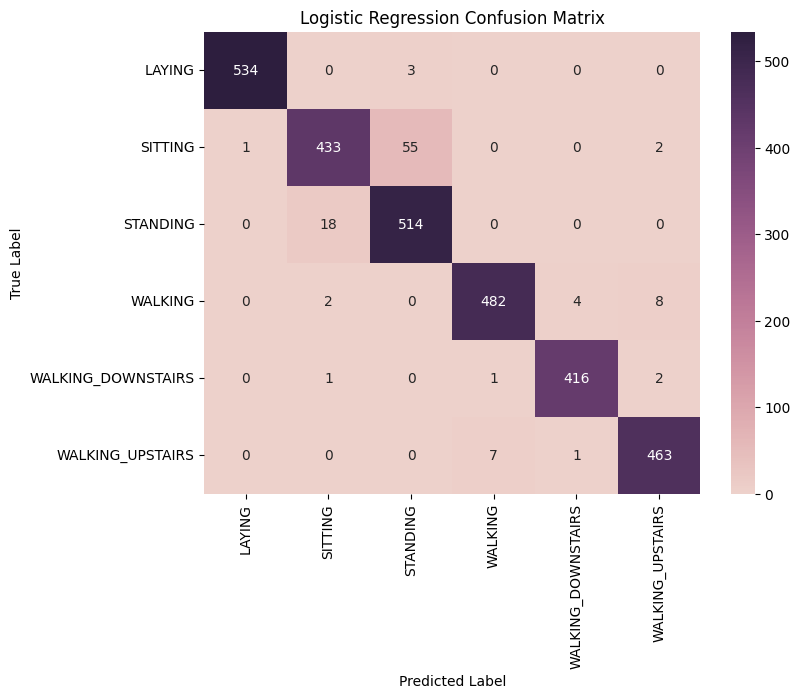

In [25]:
activity_labels = np.unique(train_df["Activity"])
acc_ML = {}
def Run_ML_Alg(features_train, features_test, accuracies):
  classifiers = {
    'Random Forest': RandomForestClassifier(random_state=5,n_estimators=50),
    'Decision Tree': DecisionTreeClassifier(random_state=5,max_depth=10),
    'K-Nearest Neighbors': KNeighborsClassifier(metric ='manhattan', n_neighbors= 7),
    'Support Vector Machine': SVC(kernel='rbf', C=1000, gamma=0.0001),
    'SVM-SGD':SGDClassifier(max_iter=1000, tol=1e-3,random_state=5, alpha=0.001, penalty='elasticnet'),
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=0, max_iter=3000, solver= 'liblinear')
  }
  for clf_name, clf in classifiers.items():
    clf.fit(features_train, train_labels)
    y_pred = clf.predict(features_test)
    accuracy = clf.score(features_test, test_labels)
    print("Classification Report:\n", metrics.classification_report(
    test_labels, y_pred))
    accuracies[clf_name] = f"{accuracy*100:.2f}%"
    cm = confusion_matrix(test_labels, y_pred)
    print(f"{clf_name} Accuracy: {accuracy*100:.2f}%")


    rs  = recall_score(test_labels, y_pred, average='macro')
    print(f"{clf_name} recall_score: {rs*100:.2f}%")

    ps = precision_score(test_labels, y_pred, average='macro')
    print(f"{clf_name} precision_score: {ps*100:.2f}%")

    f1 = f1_score(test_labels, y_pred, average='macro')
    print(f"{clf_name} f1_score: {f1*100:.2f}%")
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=activity_labels, yticklabels=activity_labels)
    plt.title(f"{clf_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
Run_ML_Alg(train_features, test_features, acc_ML)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       537
           1       0.99      0.98      0.98       491
           2       0.98      0.99      0.98       532
           3       1.00      1.00      1.00       496
           4       1.00      0.90      0.95       420
           5       1.00      0.97      0.98       471

    accuracy                           0.97      2947
   macro avg       0.98      0.97      0.97      2947
weighted avg       0.98      0.97      0.97      2947

Random Forest Accuracy: 97.49%
Random Forest recall_score: 97.25%
Random Forest precision_score: 97.82%
Random Forest f1_score: 97.46%


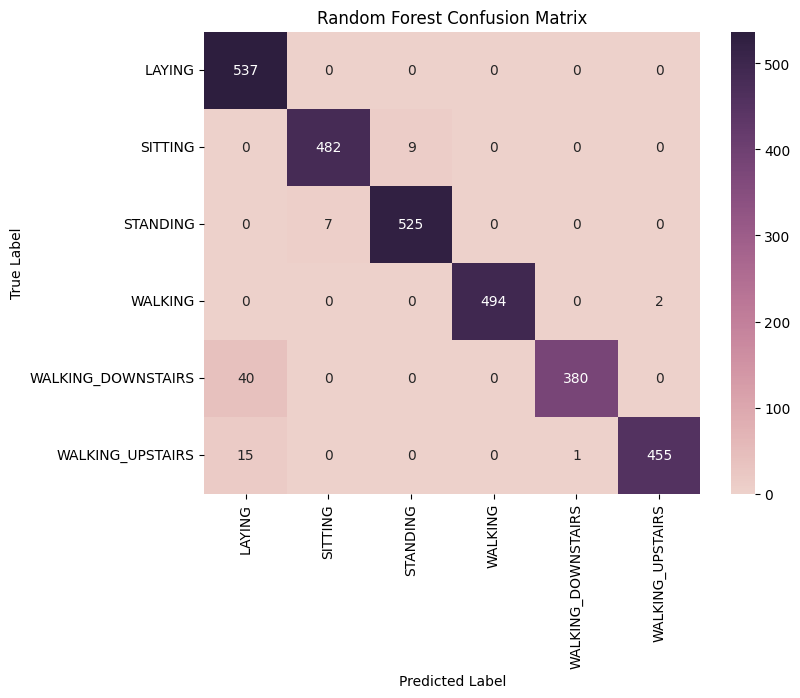

Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       537
           1       0.97      0.95      0.96       491
           2       0.95      0.97      0.96       532
           3       1.00      0.96      0.98       496
           4       0.76      0.78      0.77       420
           5       0.97      0.34      0.50       471

    accuracy                           0.84      2947
   macro avg       0.88      0.83      0.82      2947
weighted avg       0.88      0.84      0.83      2947

Decision Tree Accuracy: 84.22%
Decision Tree recall_score: 83.29%
Decision Tree precision_score: 88.03%
Decision Tree f1_score: 82.40%


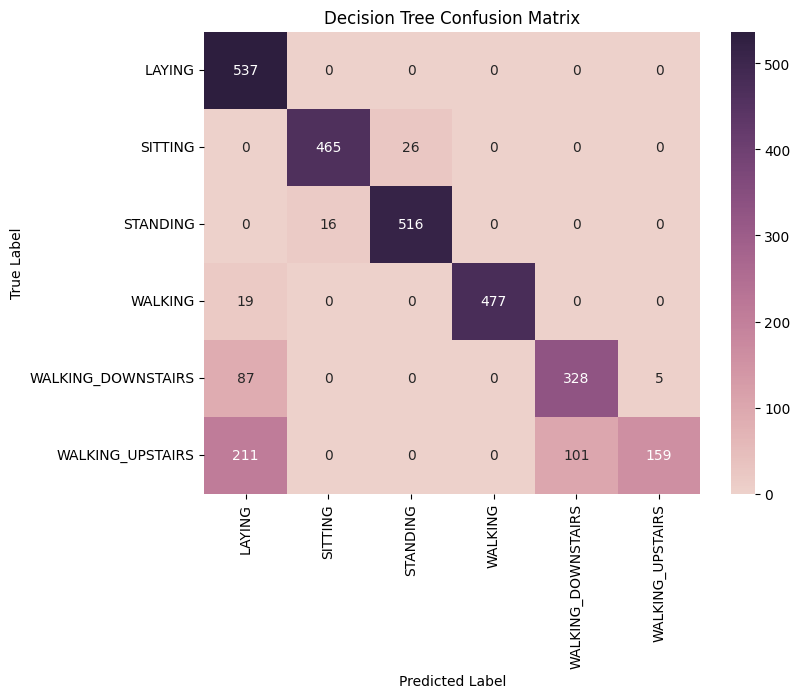

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.99      0.98      0.98       491
           2       0.98      0.99      0.98       532
           3       1.00      1.00      1.00       496
           4       0.95      1.00      0.98       420
           5       1.00      0.96      0.98       471

    accuracy                           0.99      2947
   macro avg       0.99      0.99      0.99      2947
weighted avg       0.99      0.99      0.99      2947

K-Nearest Neighbors Accuracy: 98.68%
K-Nearest Neighbors recall_score: 98.67%
K-Nearest Neighbors precision_score: 98.63%
K-Nearest Neighbors f1_score: 98.63%


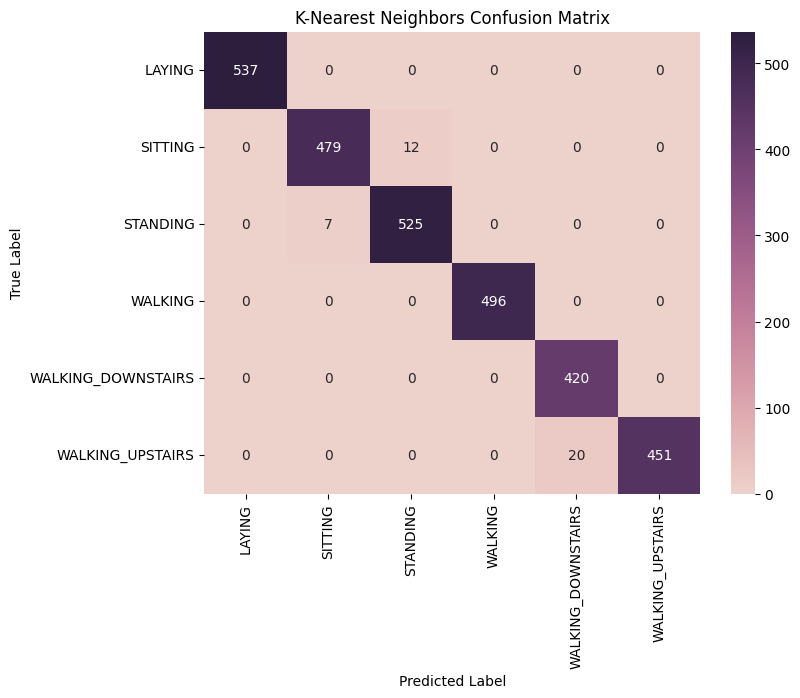

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       1.00      0.91      0.95       491
           2       0.92      1.00      0.96       532
           3       1.00      1.00      1.00       496
           4       0.99      1.00      1.00       420
           5       1.00      0.99      1.00       471

    accuracy                           0.98      2947
   macro avg       0.99      0.98      0.98      2947
weighted avg       0.98      0.98      0.98      2947

Support Vector Machine Accuracy: 98.30%
Support Vector Machine recall_score: 98.30%
Support Vector Machine precision_score: 98.50%
Support Vector Machine f1_score: 98.34%


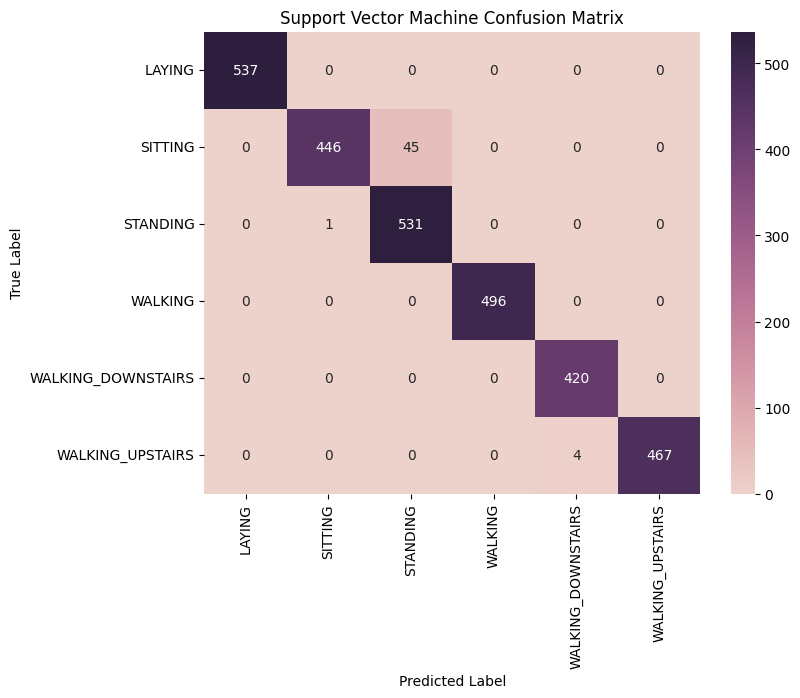

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.99      0.98      0.99       491
           2       0.99      0.99      0.99       532
           3       1.00      1.00      1.00       496
           4       1.00      1.00      1.00       420
           5       1.00      1.00      1.00       471

    accuracy                           0.99      2947
   macro avg       0.99      0.99      0.99      2947
weighted avg       0.99      0.99      0.99      2947

SVM-SGD Accuracy: 99.46%
SVM-SGD recall_score: 99.46%
SVM-SGD precision_score: 99.47%
SVM-SGD f1_score: 99.47%


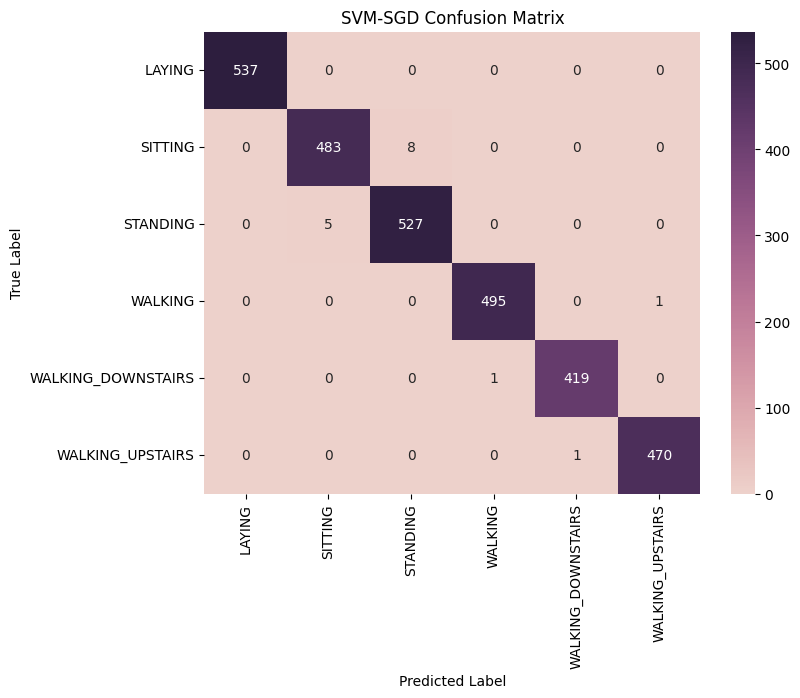

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.48      1.00      0.65       491
           2       0.00      0.00      0.00       532
           3       1.00      0.90      0.95       496
           4       0.90      1.00      0.95       420
           5       0.90      0.90      0.90       471

    accuracy                           0.79      2947
   macro avg       0.71      0.80      0.74      2947
weighted avg       0.70      0.79      0.73      2947

Gaussian Naive Bayes Accuracy: 78.79%
Gaussian Naive Bayes recall_score: 80.13%
Gaussian Naive Bayes precision_score: 71.37%
Gaussian Naive Bayes f1_score: 74.14%


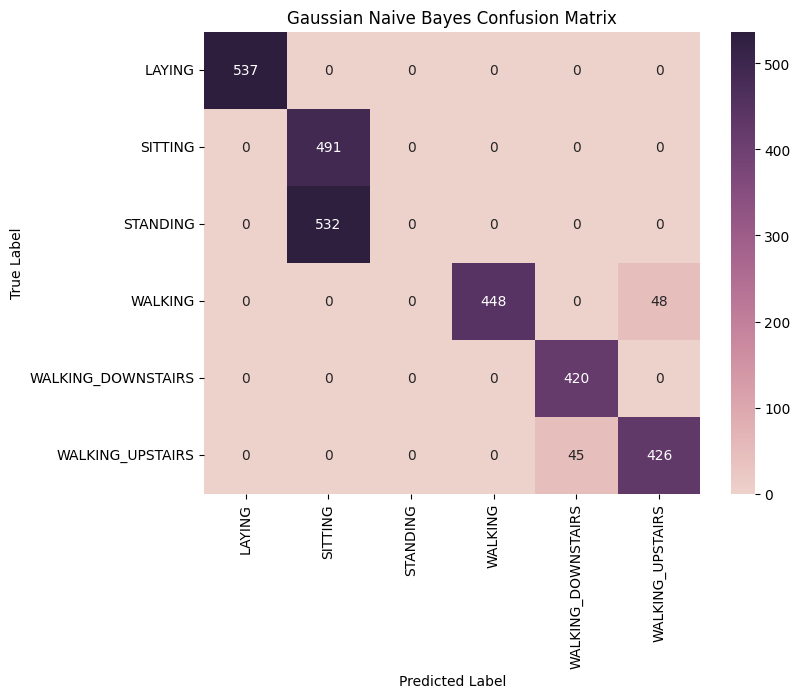

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.99      0.98      0.98       491
           2       0.98      0.99      0.99       532
           3       1.00      1.00      1.00       496
           4       0.99      1.00      1.00       420
           5       1.00      0.99      1.00       471

    accuracy                           0.99      2947
   macro avg       0.99      0.99      0.99      2947
weighted avg       0.99      0.99      0.99      2947

Logistic Regression Accuracy: 99.39%
Logistic Regression recall_score: 99.40%
Logistic Regression precision_score: 99.40%
Logistic Regression f1_score: 99.40%


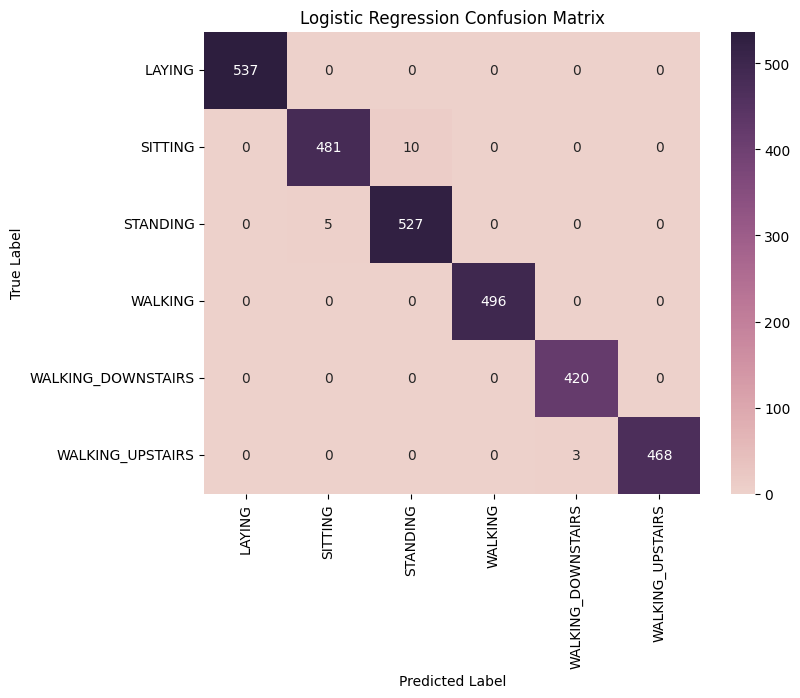

In [26]:
activity_labels = np.unique(train_df["Activity"])
acc_ML_LDA = {}
def Run_ML_Alg(features_train, features_test, accuracies):
  classifiers = {
    'Random Forest': RandomForestClassifier(random_state=5,n_estimators=50),
    'Decision Tree': DecisionTreeClassifier(random_state=5,max_depth=10),
    'K-Nearest Neighbors': KNeighborsClassifier(metric ='manhattan', n_neighbors= 7),
    'Support Vector Machine': SVC(kernel='rbf', C=1000, gamma=0.0001),
    'SVM-SGD':SGDClassifier(max_iter=1000, tol=1e-3,random_state=298, alpha=0.1, penalty="l2"),
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=0, max_iter=3000, solver= 'liblinear')
  }
  for clf_name, clf in classifiers.items():
    clf.fit(features_train, train_labels)
    y_pred = clf.predict(features_test)
    accuracy = clf.score(features_test, test_labels)
    print("Classification Report:\n", metrics.classification_report(
    test_labels, y_pred))
    accuracies[clf_name] = f"{accuracy*100:.2f}%"
    cm = confusion_matrix(test_labels, y_pred)
    print(f"{clf_name} Accuracy: {accuracy*100:.2f}%")

    rs  = recall_score(test_labels, y_pred, average='macro')
    print(f"{clf_name} recall_score: {rs*100:.2f}%")

    ps = precision_score(test_labels, y_pred, average='macro')
    print(f"{clf_name} precision_score: {ps*100:.2f}%")

    f1 = f1_score(test_labels, y_pred, average='macro')
    print(f"{clf_name} f1_score: {f1*100:.2f}%")



    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=activity_labels, yticklabels=activity_labels)
    plt.title(f"{clf_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
Run_ML_Alg(X_train_lda, X_test_lda, acc_ML_LDA)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.99      0.98      0.98       491
           2       0.98      0.95      0.96       532
           3       1.00      1.00      1.00       496
           4       0.93      1.00      0.96       420
           5       1.00      0.97      0.98       471

    accuracy                           0.98      2947
   macro avg       0.98      0.98      0.98      2947
weighted avg       0.98      0.98      0.98      2947

Random Forest Accuracy: 98.27%
Random Forest recall_score: 98.31%
Random Forest precision_score: 98.19%
Random Forest f1_score: 98.22%


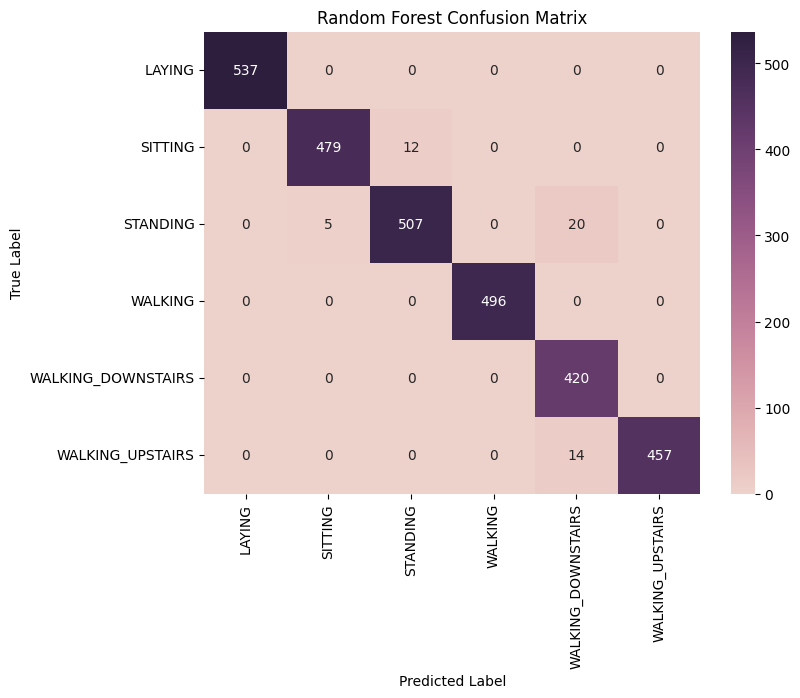

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.92      0.99      0.95       491
           2       0.99      0.92      0.95       532
           3       0.90      1.00      0.95       496
           4       0.99      0.92      0.95       420
           5       1.00      0.95      0.97       471

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.97      0.96      0.96      2947

Decision Tree Accuracy: 96.40%
Decision Tree recall_score: 96.29%
Decision Tree precision_score: 96.66%
Decision Tree f1_score: 96.36%


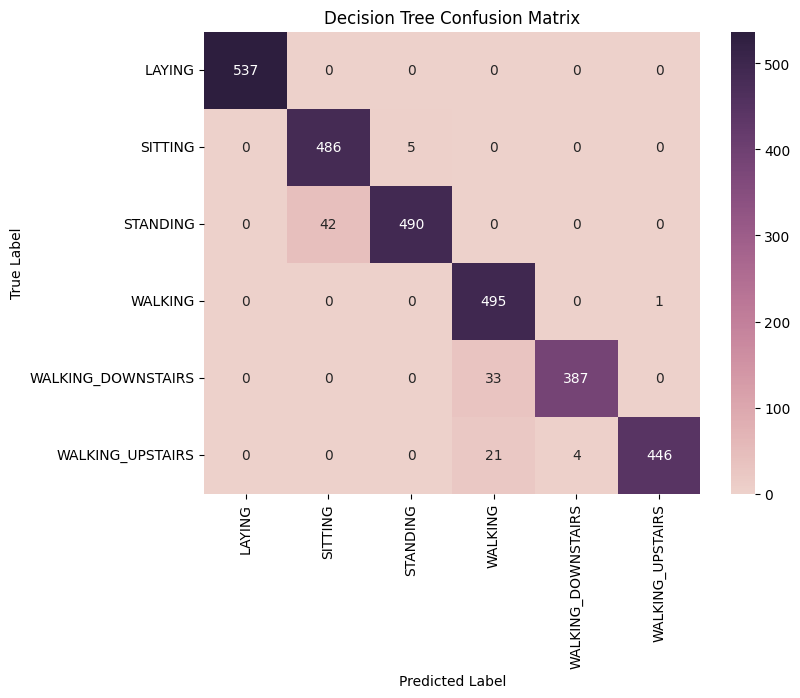

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.99      0.97      0.98       491
           2       0.97      0.99      0.98       532
           3       1.00      1.00      1.00       496
           4       0.93      1.00      0.96       420
           5       1.00      0.93      0.96       471

    accuracy                           0.98      2947
   macro avg       0.98      0.98      0.98      2947
weighted avg       0.98      0.98      0.98      2947

K-Nearest Neighbors Accuracy: 98.13%
K-Nearest Neighbors recall_score: 98.10%
K-Nearest Neighbors precision_score: 98.08%
K-Nearest Neighbors f1_score: 98.04%


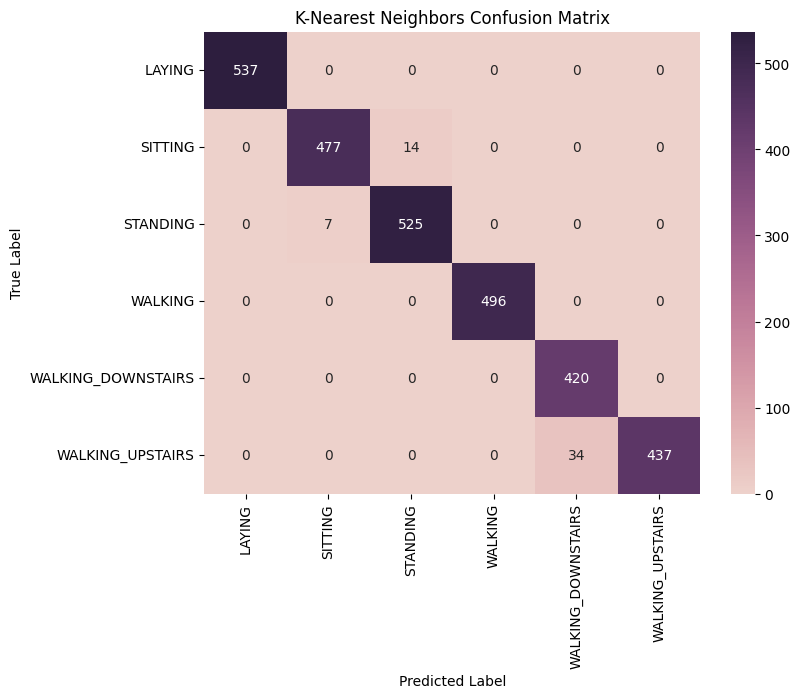

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       1.00      0.90      0.95       491
           2       0.92      1.00      0.96       532
           3       1.00      1.00      1.00       496
           4       0.96      1.00      0.98       420
           5       1.00      0.96      0.98       471

    accuracy                           0.98      2947
   macro avg       0.98      0.98      0.98      2947
weighted avg       0.98      0.98      0.98      2947

Support Vector Machine Accuracy: 97.73%
Support Vector Machine recall_score: 97.70%
Support Vector Machine precision_score: 97.89%
Support Vector Machine f1_score: 97.71%


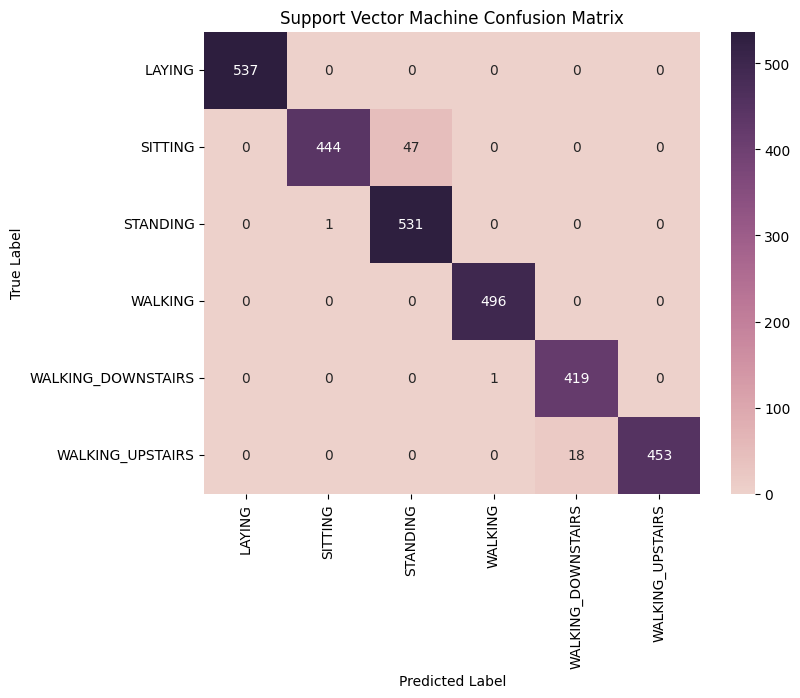

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.99      0.98      0.99       491
           2       0.98      0.99      0.99       532
           3       1.00      1.00      1.00       496
           4       1.00      1.00      1.00       420
           5       1.00      1.00      1.00       471

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947

SVM-SGD Accuracy: 99.52%
SVM-SGD recall_score: 99.53%
SVM-SGD precision_score: 99.55%
SVM-SGD f1_score: 99.54%


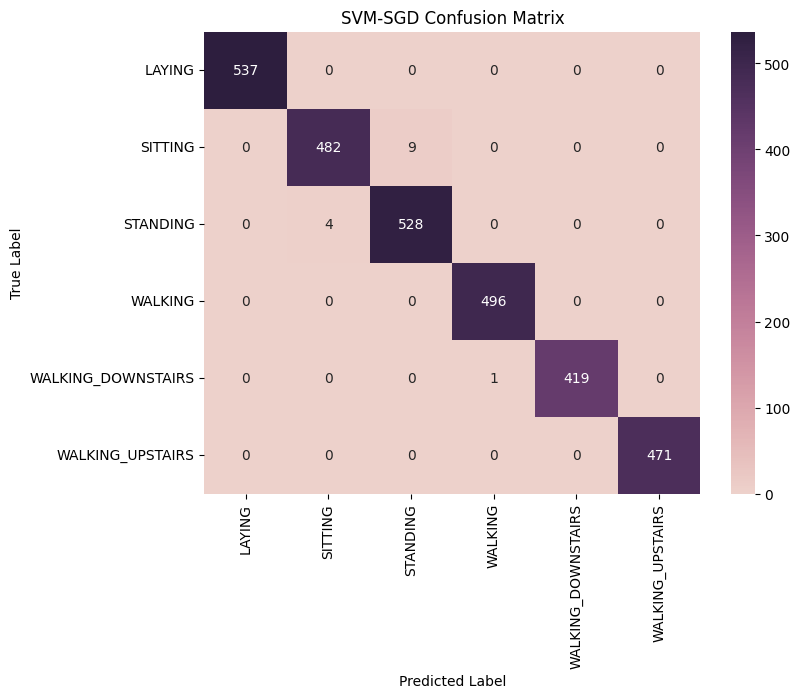

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       1.00      0.89      0.94       491
           2       0.91      1.00      0.95       532
           3       1.00      1.00      1.00       496
           4       0.94      1.00      0.97       420
           5       1.00      0.95      0.97       471

    accuracy                           0.97      2947
   macro avg       0.98      0.97      0.97      2947
weighted avg       0.98      0.97      0.97      2947

Gaussian Naive Bayes Accuracy: 97.35%
Gaussian Naive Bayes recall_score: 97.32%
Gaussian Naive Bayes precision_score: 97.55%
Gaussian Naive Bayes f1_score: 97.32%


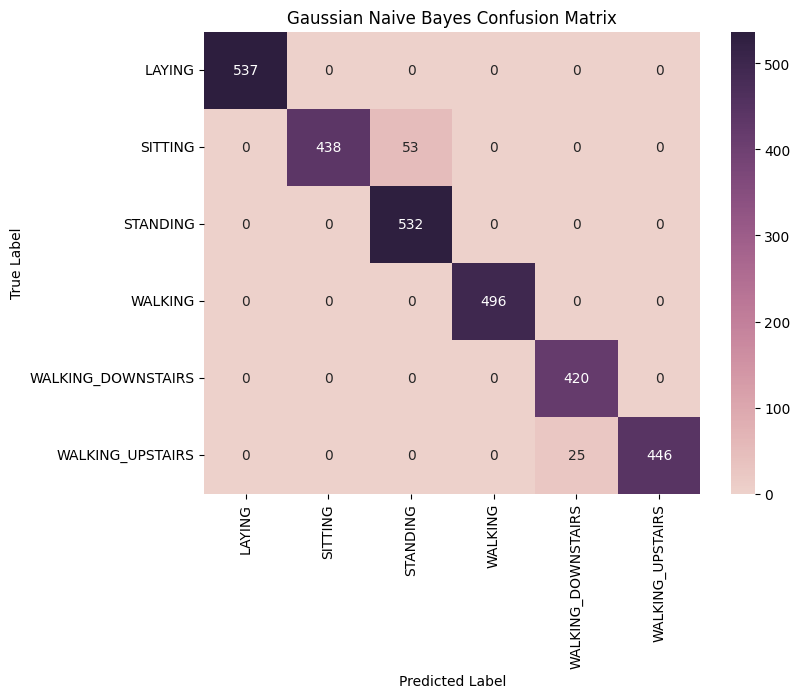

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       1.00      0.94      0.97       491
           2       0.95      1.00      0.97       532
           3       1.00      1.00      1.00       496
           4       1.00      1.00      1.00       420
           5       1.00      1.00      1.00       471

    accuracy                           0.99      2947
   macro avg       0.99      0.99      0.99      2947
weighted avg       0.99      0.99      0.99      2947

Logistic Regression Accuracy: 98.91%
Logistic Regression recall_score: 98.91%
Logistic Regression precision_score: 99.04%
Logistic Regression f1_score: 98.95%


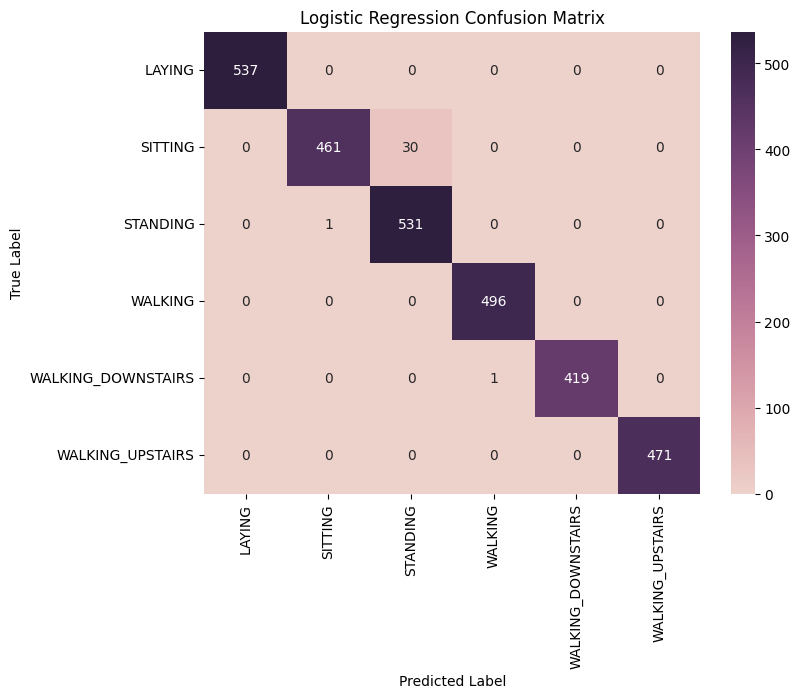

In [27]:
activity_labels = np.unique(train_df["Activity"])
acc_ML_ANN_LDA_SGD = {}

def Run_ML_Alg(features_train, features_test, accuracies):
  classifiers = {
    'Random Forest': RandomForestClassifier(random_state=5,n_estimators=50),
    'Decision Tree': DecisionTreeClassifier(random_state=5,max_depth=10),
    'K-Nearest Neighbors': KNeighborsClassifier(metric ='manhattan', n_neighbors= 7),
    'Support Vector Machine': SVC(kernel='rbf', C=1000, gamma=0.0001),
    'SVM-SGD':SGDClassifier(max_iter=1000, tol=1e-3,random_state=451, alpha=0.1, penalty='elasticnet'),
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=0, max_iter=3000, solver= 'liblinear')
  }
  for clf_name, clf in classifiers.items():
    clf.fit(features_train, train_labels)
    y_pred = clf.predict(features_test)
    accuracy = clf.score(features_test, test_labels)

    print("Classification Report:\n", metrics.classification_report(
    test_labels, y_pred))

    accuracies[clf_name] = f"{accuracy*100:.2f}%"
    cm = confusion_matrix(test_labels, y_pred)
    print(f"{clf_name} Accuracy: {accuracy*100:.2f}%")



    rs  = recall_score(test_labels, y_pred, average='macro')
    print(f"{clf_name} recall_score: {rs*100:.2f}%")

    ps = precision_score(test_labels, y_pred, average='macro')
    print(f"{clf_name} precision_score: {ps*100:.2f}%")

    f1 = f1_score(test_labels, y_pred, average='macro')
    print(f"{clf_name} f1_score: {f1*100:.2f}%")
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=activity_labels, yticklabels=activity_labels)
    plt.title(f"{clf_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Run_ML_Alg(extracted_features_train, extracted_features_test, acc_ML_ANN_LDA_SGD)

In [28]:
acc_ML

{'Random Forest': '90.33%',
 'Decision Tree': '80.83%',
 'K-Nearest Neighbors': '91.55%',
 'Support Vector Machine': '96.50%',
 'SVM-SGD': '94.67%',
 'Gaussian Naive Bayes': '57.14%',
 'Logistic Regression': '96.44%'}

In [29]:
acc_ML_LDA

{'Random Forest': '97.49%',
 'Decision Tree': '84.22%',
 'K-Nearest Neighbors': '98.68%',
 'Support Vector Machine': '98.30%',
 'SVM-SGD': '99.46%',
 'Gaussian Naive Bayes': '78.79%',
 'Logistic Regression': '99.39%'}

In [30]:
acc_ML_ANN_LDA_SGD

{'Random Forest': '98.27%',
 'Decision Tree': '96.40%',
 'K-Nearest Neighbors': '98.13%',
 'Support Vector Machine': '97.73%',
 'SVM-SGD': '99.52%',
 'Gaussian Naive Bayes': '97.35%',
 'Logistic Regression': '98.91%'}

93/93 [==============================] - 0s 3ms/step
 recall_score: 99.50%
precision_score: 99.51%
f1_score: 99.50%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.99      0.98      0.99       491
           2       0.98      0.99      0.99       532
           3       1.00      1.00      1.00       496
           4       1.00      1.00      1.00       420
           5       1.00      1.00      1.00       471

    accuracy                           0.99      2947
   macro avg       1.00      0.99      1.00      2947
weighted avg       0.99      0.99      0.99      2947

Confusion matrix plot showing



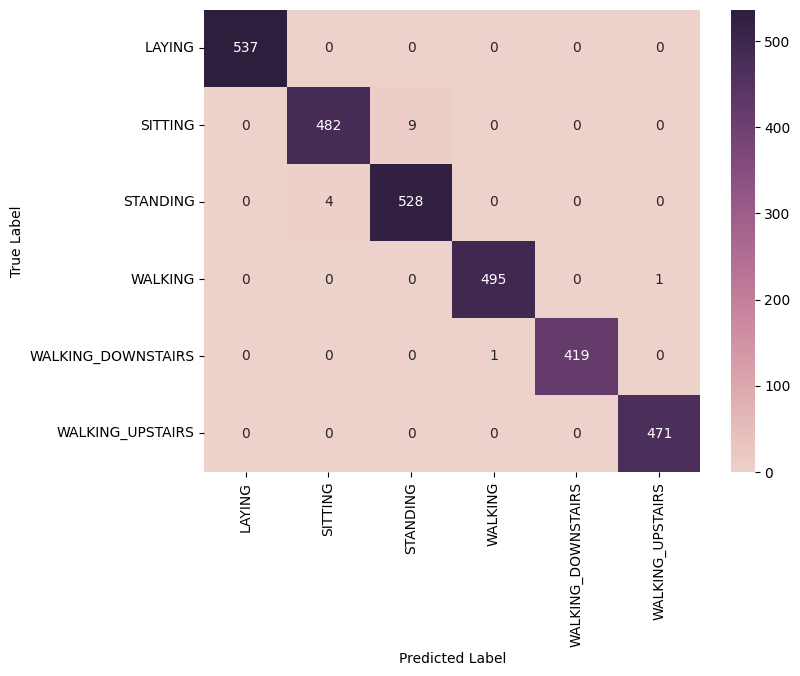

In [34]:
y_NN_pred = model_ANN_load.predict(X_test_lda)
rs  = recall_score(test_labels, y_NN_pred.argmax(axis=1), average='macro')
print(f" recall_score: {rs*100:.2f}%")
ps = precision_score(test_labels, y_NN_pred.argmax(axis=1), average='macro')
print(f"precision_score: {ps*100:.2f}%")
f1 = f1_score(test_labels, y_NN_pred.argmax(axis=1), average='macro')
print(f"f1_score: {f1*100:.2f}%")
print("Classification Report:\n", metrics.classification_report(test_labels, y_NN_pred.argmax(axis=1)))
print("Confusion matrix plot showing\n")
cm_raw_nn = metrics.confusion_matrix(test_labels, y_NN_pred.argmax(axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw_nn, annot=True, fmt="d", cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=activity_labels, yticklabels=activity_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()